In [5]:
import os
from collections import defaultdict
from statistics import mean, median
import pandas as pd
from matplotlib import pyplot as plt
from numpy.ma import arange

r100k = pd.read_csv('../../../data/ratings100k.csv').drop('Unnamed: 0', 1)
print(r100k[:10])
r70k = pd.read_csv('../../../data/ratings70k.csv').drop('Unnamed: 0', 1)
entities = pd.read_csv('../../../data/entities.csv')
print(entities[:10])

                                 userId  \
0  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
1  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
2  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
3  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
4  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
5  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
6  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
7  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
8  d50f84c0-17cd-11ea-bd9f-33d41a12d743   
9  d50f84c0-17cd-11ea-bd9f-33d41a12d743   

                                        uri  isItem  sentiment  
0  http://www.wikidata.org/entity/Q19347291    True          1  
1   http://www.wikidata.org/entity/Q1342372   False          1  
2    http://www.wikidata.org/entity/Q105801    True          1  
3    http://www.wikidata.org/entity/Q191104   False          1  
4    http://www.wikidata.org/entity/Q471839   False          1  
5   http://www.wikidata.org/entity/Q2484376   False          1  
6    http://www.wikidata.org/entity/Q858724    True          1  
7     

                                     userId  \
16155  3a73c670-17ef-11ea-a756-9f305ba551ba   
16183  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16184  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16185  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16186  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16187  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16188  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16189  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16190  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16191  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16192  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16193  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16194  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16195  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16196  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16197  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16198  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16199  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16200  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16201  1acc2f60-1790-11ea-9f2b-f342be8b8d43   
16202  1acc2f

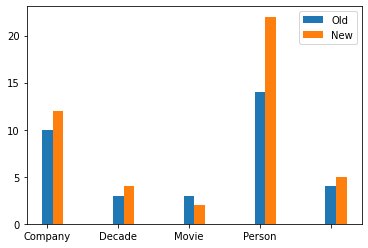

<Figure size 432x288 with 0 Axes>

In [28]:
def get_count(df, ents):
    df = df[df['sentiment'] != 0]
    print(df[7017:7046])

    c = pd.merge(df, ents, on='uri')
    c['labels'] = c['labels'].apply(lambda k: k.split('|')[0])
    c = c.groupby(['userId','labels']).count().uri
    print(c[:10])
    c_list = defaultdict(list)
    for (user, group), count in c.iteritems():
        if user == '1acc2f60-1790-11ea-9f2b-f342be8b8d43':
            print('a')
        c_list[group].append(count)

    cd = dict()
    for group, lst in c_list.items():
        cd[group] = median(lst)

    return cd

c100k = get_count(r100k, entities)
c70k = get_count(r70k, entities)

width = 0.15
ind = arange(len(c70k.values()))
fig, ax = plt.subplots()
x = list(c100k.keys())
print(x)
y = list(c100k.values())
print(y)
ax.bar(ind + 0 * width, y,width=width, label='Old')

y = list(c70k.values())
ax.bar(ind + 1 * width, y,width=width, label='New')
ax.set_xticklabels(x)
plt.legend()
plt.show()
plt.savefig('../results/output/num_ratings.pdf', bbox_inches='tight')